the python version is 3.7.12




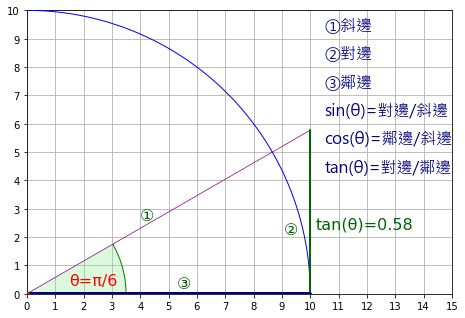

In [6]:
# (home)/00-Penta-Flower/
# 30_Trigonometry_2
# 2021-12-06
#
# python 3.8.10
# run on replit.com
# run on mybinder.org
#
# python 3.9.1
# run on miniconda 3 JupyterLab
#
# 要執行本程式, 請按上方run▶
#
# to fix matplotlib warning
import os
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
#
from platform import python_version
print('the python version is',python_version())
print('\n')
#
import numpy as np
# 載入繪圖模組 pyplot, 重新命名為 plot
import matplotlib.pyplot as plt
import matplotlib.font_manager as fontManager
myfont = fontManager.FontProperties(fname='/home/jovyan/fonts/msjh.ttc')
#
import json
from shapely import affinity
from shapely.ops import cascaded_union, unary_union
from shapely.geometry  import LineString, Point, Polygon, shape
#
# ---------------------------------------------
#
def set_graphic_area(width,height) :
        
    cm2inch = 1/2.54    # inch per cm
    #
    # define graphic area
    #
    left_margin = 1.0   # cm
    right_margin = 1.0  # cm
    #
    figure_width  = width  # cm , from xmin to xmax
    figure_height = height # cm , from ymin to ymax
    #
    top_margin = 1.0    # cm
    bottom_margin = 1.0 # cm
    #
    box_width = left_margin + figure_width + right_margin   # cm
    box_height = top_margin + figure_height + bottom_margin # cm
    #
    top_value    = 1.0 - top_margin / box_height
    bottom_value = bottom_margin / box_height
    left_value   = left_margin / box_width
    right_value  = 1.0 - right_margin / box_width
    #
    return (box_width*cm2inch,box_height*cm2inch,top_value,bottom_value,left_value,right_value,width)
#
# end of def
#
def shapely_Arc(cxy, r, start_angle, end_angle) :

    numsegments = 720
    # The coordinates of the arc
    theta = np.radians(np.linspace(start_angle, end_angle, numsegments))
    x = cxy[0] + r * np.cos(theta)
    y = cxy[1] + r * np.sin(theta)
    Arc = LineString(np.column_stack([x, y]))
    return Arc
#
# end of def
#
def motif_line(LS, MYcolor, ZORDER, LINEWIDTH) :
    #
    xs, ys = LS.xy
    ax.plot(xs, ys, color=MYcolor, alpha=1.0, linewidth=LINEWIDTH, solid_capstyle='round', zorder=ZORDER)
    return
#
def motif_fill(LS, color, ZORDER, Alpha) :
    #
    xs, ys = LS.xy
    ax.fill(xs, ys, alpha=Alpha, closed=True, edgecolor=None, facecolor=color, fill=True, zorder=ZORDER)
    return
#
# ------------------------------------------------------------------------------------------------
#
# tup7 is type of Tuple, have 7 indexed value
#
tup7 = set_graphic_area(15, 10)  
fig = plt.figure(figsize=(tup7[0], tup7[1])) # 呼叫 pyplot.figure(), 建立一個圖表物件, 並成為目前圖表物件
ax = fig.add_subplot(1,1,1)   # 圖表的繪圖區域被分為1個子圖, 1 row, 1 column, plot to index 1
fig.subplots_adjust(
                top    = tup7[2] ,
                bottom = tup7[3] ,
                left   = tup7[4] ,
                right  = tup7[5] ,
                )
#
plt.xlim(0, 15)    # 設定X軸的顯示範圍, from xmin to xmax
plt.ylim(0, 10)    # 設定Y軸的顯示範圍, from ymin to ymax
#
xvalues = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
yvalues = [0,1,2,3,4,5,6,7,8,9,10]
plt.xticks(xvalues)
plt.yticks(yvalues)
plt.tick_params(labelsize=10)
#
plt.grid(True)
ax.set_axis_on()    # will turn on  grid line
# ax.set_axis_off() # will turn off grid line
#
# get current axes, set X,Y same ratio & scale  
plt.gca().set_aspect('equal', adjustable='box')
#
plt.savefig("./png/1-00.png",format="png",dpi=150)
#
cxy = (0,0)
r0 = 0.1
r1 = 3.5
r2 = 10
cir_0 = shapely_Arc((0,0), r0,  0, 360)
arc_1 = shapely_Arc((0,0), r1,  0, 30)
arc_2 = shapely_Arc((0,0), r2,  0, 90)
sector_30_xy = [cxy] + arc_1.coords[:] + [cxy]
sector_30    = LineString(sector_30_xy)
# print(sector_30_xy)
#
motif_fill(cir_0, 'red',   60, 1.0) 
motif_fill(sector_30, 'lightgreen',5, 0.3) 
motif_line(arc_1, 'green',    10, 1.0) 
motif_line(arc_2, 'blue',     10, 1.0) 
#
plt.savefig("./png/30_Trigonometry_21.png",format="png",dpi=150)
#
posi_30_xy = (r2*np.cos(1*np.pi/6), r2*np.sin(1*np.pi/6))
posi_45_xy = (r2*np.cos(1*np.pi/4), r2*np.sin(1*np.pi/4))
posi_60_xy = (r2*np.cos(1*np.pi/3), r2*np.sin(1*np.pi/3))
#
line_theta_30 = LineString([cxy, posi_30_xy])
line_cos_30   = LineString([cxy,        (posi_30_xy[0], 0)])
v_line = LineString([(r2,0), (r2,10)])
#
tx = posi_30_xy[0]
ty = posi_30_xy[1]
line_extend_txy = affinity.translate(line_theta_30, 0.5*tx, 0.5*ty)
its_1 = line_extend_txy.intersection(v_line)
its_1_xy = (its_1.x, its_1.y)
line_tan_30 = LineString([its_1_xy, (its_1.x, 0)])
h_line = LineString([cxy, (its_1.x, 0)])
#
new_line_theta_30 = LineString([cxy, its_1_xy])
#
motif_line(new_line_theta_30, 'purple', 10, 0.7) 
motif_line(line_tan_30, 'darkgreen', 20, 2.0) 
motif_line(h_line,           'navy', 20, 4.0) 
#
plt.savefig("./png/30_Trigonometry_22.png",format="png",dpi=150)
#
str1_xy = (10.5, 9.3)
str1    = "①斜邊"
ax.annotate(str1, str1_xy,
            color='navy',
            fontproperties=myfont,
            fontsize=16, 
            zorder=10)
#
str2_xy = (10.5, 8.3)
str2    = "②對邊"
ax.annotate(str2, str2_xy,
            color='navy',
            fontproperties=myfont,
            fontsize=16, 
            zorder=10)
#
str3_xy = (10.5, 7.3)
str3    = "③鄰邊"
ax.annotate(str3, str3_xy,
            color='navy',
            fontproperties=myfont,
            fontsize=16, 
            zorder=10)
#
## -------------------------------------------------------------
#
math1_xy = (10.5, 6.3)
math1    = "sin(θ)=對邊/斜邊"
ax.annotate(math1, math1_xy,
            color='navy',
            fontproperties=myfont,
            fontsize=16, 
            zorder=10)
#
math2_xy = (10.5, 5.3)
math2    = "cos(θ)=鄰邊/斜邊"
ax.annotate(math2, math2_xy,
            color='navy',
            fontproperties=myfont,
            fontsize=16, 
            zorder=10)
#
math3_xy = (10.5, 4.3)
math3    = "tan(θ)=對邊/鄰邊"
ax.annotate(math3, math3_xy,
            color='navy',
            fontproperties=myfont,
            fontsize=16, 
            zorder=10)
#
## -------------------------------------------------------------
#
Ucode1_xy = (4.0, 2.6)
Ucode1    = "①"
ax.annotate(Ucode1, Ucode1_xy,
            color='darkgreen',
            # fontproperties=myfont,
            fontsize=16, 
            zorder=10)
#
Ucode2_xy = (9.07, 2.1)
Ucode2    = "②"
ax.annotate(Ucode2, Ucode2_xy,
            color='darkgreen',
            # fontproperties=myfont,
            fontsize=16, 
            zorder=10)
#
Ucode3_xy = (5.3, 0.2)
Ucode3    = "③"
ax.annotate(Ucode3, Ucode3_xy,
            color='darkgreen',
            # fontproperties=myfont,
            fontsize=16, 
            zorder=10)
#
## -------------------------------------------------------------
#
text1_xy = (1.5, 0.3)
ax.annotate("θ=π/6", text1_xy,
            color='red',
            # fontproperties=myfont,
            fontsize=16, 
            zorder=10)
#
dy = round(its_1_xy[1]/10,2)
text2_xy = (10.2, 2.3)
text2    = "tan(θ)=" + str(dy)
ax.annotate(text2, text2_xy,
            color='darkgreen',
            # fontproperties=myfont,
            fontsize=16, 
            zorder=10)
#
plt.savefig("./png/30_Trigonometry_23.png",format="png",dpi=150)
#